<a href="https://colab.research.google.com/github/AbdullahAlTalaq/AbdullahAlTalaq/blob/main/stroke_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook is dedicated for stroke disease

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

##Performing EDA Analysis

In [ ]:
# view df head
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Check for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

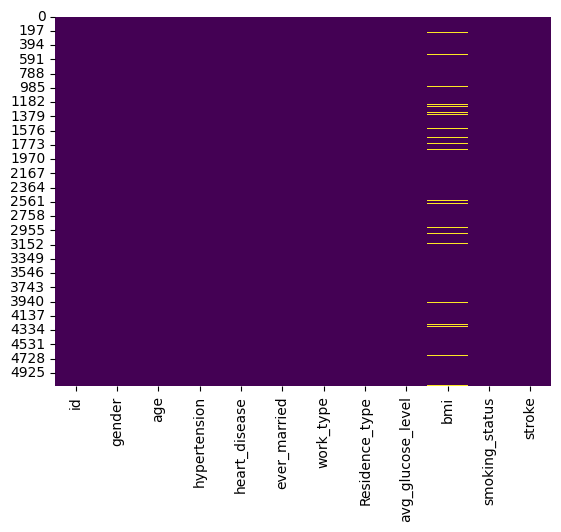

In [ ]:
# Visualising the missing values
sns.heatmap(df.isnull(), cbar= False, cmap= "viridis")

In [ ]:
# impute missing values in the dataset
df.bmi = df["bmi"].fillna(df.bmi.mean())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Create new feature bmi_category
df["bmi_category"] = pd.cut(df.bmi,
                            bins= [0, 18.5, 25, 30, float('inf')],
                            labels= ["Underweight", "normal", "Overweight", "Obese"])

df["glucose_category"] = pd.cut(df.avg_glucose_level,
                                bins= [0, 70, 100, 125, float("inf")],
                                labels= ["Low", "Normal", "Prediabetes", "Diabetes"])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obese,Diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obese,Prediabetes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obese,Diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,normal,Diabetes


In [ ]:
# Checking for wrong entires like symbols
for col in df.columns:
  print(f"column name: {col}\nunique values for {col}:\n\n{df[col].value_counts()}\n")
  print("---------------------------------------------------------")

column name: id
unique values for id:

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64

---------------------------------------------------------
column name: gender
unique values for gender:

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

---------------------------------------------------------
column name: age
unique values for age:

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

---------------------------------------------------------
column name: hypertension
unique values for hypertension:

0    4612
1     498
Name: hypertension, dtype: int64

---------------------------------------------------------
column name: heart_disease
unique values for heart_disease:

0    4834
1     276
Name: heart_disease, dtype: int64


In [ ]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  bmi_category       5110 non-null   category
 13  glucose_category   5110 non-null   category
dtypes: category(2), float64(3), int64(4), object(5)
memory usage: 489.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == "object" or df[i].dtype == "category":
    df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
 12  bmi_category       5110 non-null   int64  
 13  glucose_category   5110 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 559.0 KB


<Axes: >

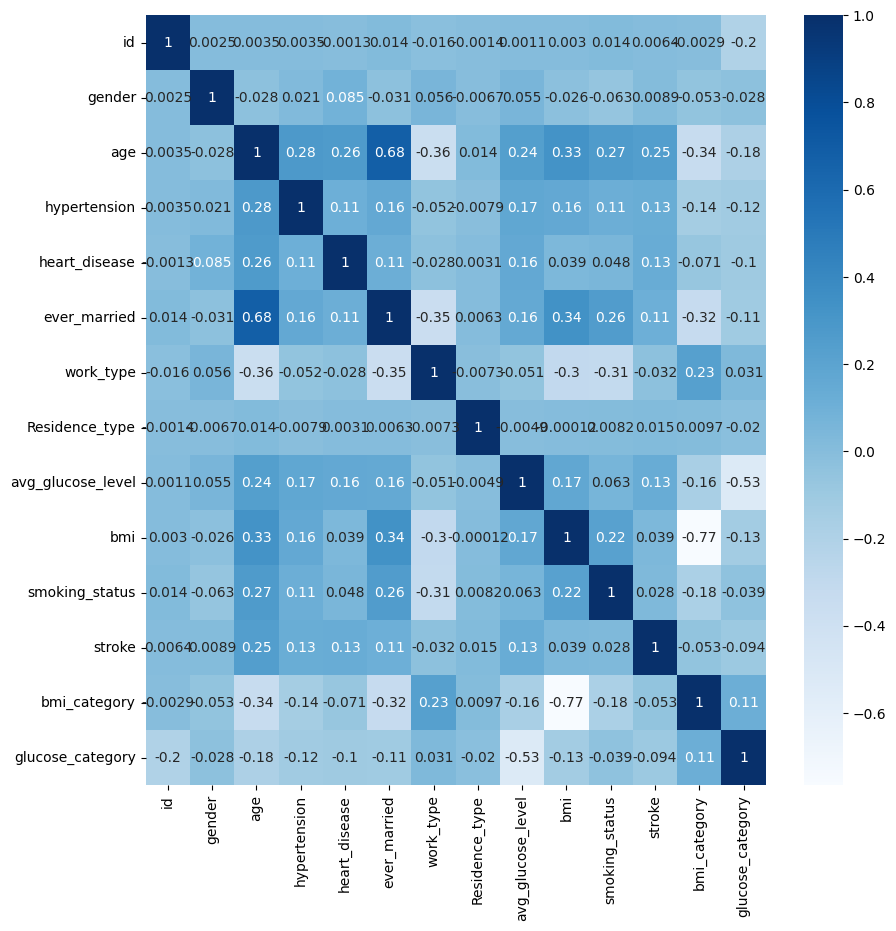

In [ ]:
# Let's check the correlation between differenrt variable

plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), cbar= True, annot= True, cmap= "Blues")

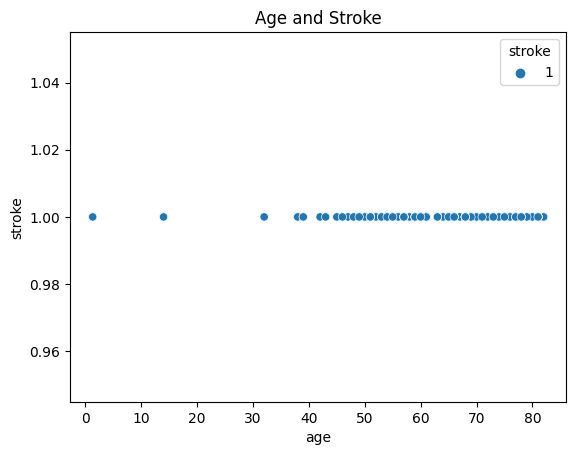

In [ ]:
# Visualising the relationship between vaiables

df_stroke = df[df["stroke"] == 1]

sns.scatterplot(x= "age", y= "stroke", hue= "stroke", data= df_stroke)
plt.title("Age and Stroke")
plt.show()

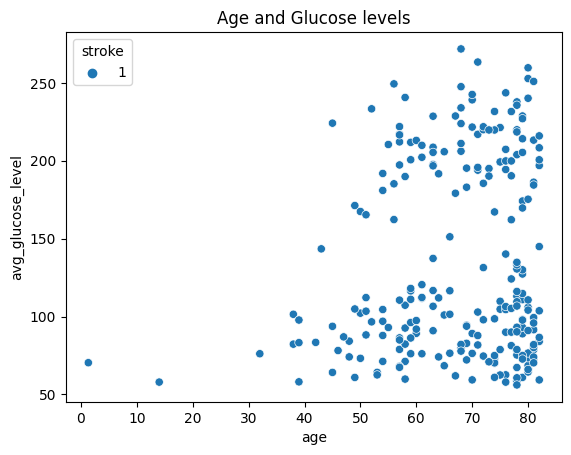

In [ ]:
# Visualising the relationship between vaiables

sns.scatterplot(x= "age", y= "avg_glucose_level", hue= "stroke", data= df_stroke)
plt.title("Age and Glucose levels")
plt.show()

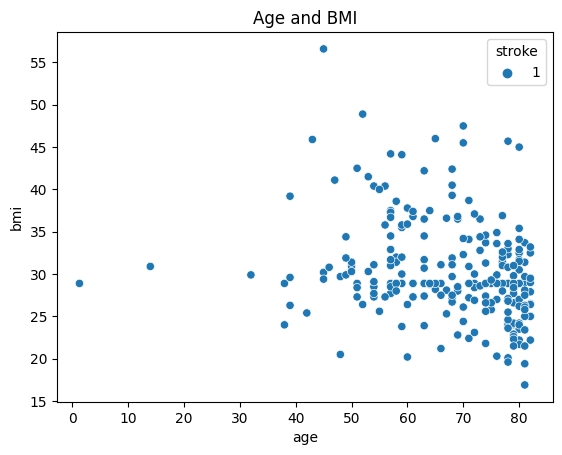

In [ ]:
# Visualising the relationship between vaiables

sns.scatterplot(x= "age", y= "bmi", hue= "stroke", data= df_stroke)
plt.title("Age and BMI")
plt.show()